In [1]:
import pandas as pd
df_transaction = pd.read_csv("C:\\Users\\amish\\Downloads\\ieee-fraud-detection\\train_transaction.csv")
df_identity = pd.read_csv("C:\\Users\\amish\\Downloads\\ieee-fraud-detection\\train_identity.csv")
display(df_transaction.head())
display(df_identity.head())

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [2]:
df = df_transaction.merge(df_identity,on="TransactionID",how="left")
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [3]:
# Check missing values percentage
missing_values = df.isnull().sum() / len(df) * 100

# Display columns with missing values
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Columns with Missing Values (%):")
print(missing_values)


Columns with Missing Values (%):
id_24    99.196159
id_25    99.130965
id_07    99.127070
id_08    99.127070
id_21    99.126393
           ...    
V285      0.002032
V284      0.002032
V280      0.002032
V279      0.002032
V312      0.002032
Length: 414, dtype: float64


In [4]:
# 1️⃣ Drop columns with more than 90% missing values  
threshold = 90  # Set threshold  
cols_to_drop = missing_values[missing_values > threshold].index.tolist()  
df.drop(columns=cols_to_drop, inplace=True)  

print(f"Dropped {len(cols_to_drop)} columns with >{threshold}% missing values.")

# 2️⃣ Fill numerical columns with median  
num_cols = df.select_dtypes(include=['number']).columns  
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))  

# 3️⃣ Fill categorical columns with "Unknown"  
cat_cols = df.select_dtypes(include=['object']).columns  
df[cat_cols] = df[cat_cols].fillna("Unknown")  

# ✅ Check if any missing values remain  
print("\nMissing Values After Cleaning:")
print(df.isnull().sum().sum())  # Should print 0 if all missing values are handled


Dropped 12 columns with >90% missing values.

Missing Values After Cleaning:
0


In [5]:
# Drop TransactionID (not needed for ML model)
df.drop(columns=["TransactionID"], inplace=True)

print(f"New dataset shape: {df.shape}")  # Should have 1 column less


New dataset shape: (590540, 421)


In [6]:
# Create new features based on transaction amount
import numpy as np
df["TransactionAmt_Log"] = np.log1p(df["TransactionAmt"])  # Log-transform for skewed data

# Time-based features
df["Hour"] = df["TransactionDT"] // 3600 % 24  # Convert seconds to hours
df["Day"] = df["TransactionDT"] // (3600 * 24) % 7  # Convert to day of the week

print("New fraud-related features added!")


New fraud-related features added!


C:\Users\amish\AppData\Local\Temp\ipykernel_25976\2070161829.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["TransactionAmt_Log"] = np.log1p(df["TransactionAmt"])  # Log-transform for skewed data
C:\Users\amish\AppData\Local\Temp\ipykernel_25976\2070161829.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Hour"] = df["TransactionDT"] // 3600 % 24  # Convert seconds to hours
C:\Users\amish\AppData\Local\Temp\ipykernel_25976\2070161829.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the res

In [7]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

print("Categorical features encoded!")


Categorical features encoded!


In [8]:
# Load PaySim dataset
df_paysim = pd.read_csv("C:\\Users\\amish\\Downloads\\archive (1)\\PS_20174392719_1491204439457_log.csv")

# Display first few rows
print("PaySim Dataset Preview:")
display(df_paysim.head())

# Check column names
print("\nColumn Names in PaySim:")
print(df_paysim.columns)


PaySim Dataset Preview:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0



Column Names in PaySim:
Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [9]:
# Rename columns to match IEEE-CIS
df_paysim.rename(columns={
    "amount": "TransactionAmt",
    "isFraud": "isFraudLabel",  # Match IEEE-CIS fraud column
    "step": "TransactionDT"  # Convert step to time format
}, inplace=True)

# Drop unnecessary ID columns
df_paysim.drop(columns=["nameOrig", "nameDest"], inplace=True)

# Add new fraud-related features for consistency
df_paysim["TransactionAmt_Log"] = np.log1p(df_paysim["TransactionAmt"])  # Log transformation
df_paysim["Hour"] = df_paysim["TransactionDT"] % 24  # Convert step to hour
df_paysim["Day"] = df_paysim["TransactionDT"] // 24  # Convert step to day

print(f"Updated PaySim Dataset Shape: {df_paysim.shape}")
df_paysim.head()


Updated PaySim Dataset Shape: (6362620, 12)


,TransactionDT,type,TransactionAmt,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraudLabel,isFlaggedFraud,TransactionAmt_Log,Hour,Day
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,9.194276,1,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,7.531166,1,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,5.204007,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,5.204007,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,9.364703,1,0


In [10]:
# Rename PaySim fraud label to match IEEE-CIS
df_paysim.rename(columns={"isFraudLabel": "isFraud"}, inplace=True)

# Align column orders
common_columns = list(set(df.columns) & set(df_paysim.columns))
df_paysim = df_paysim[common_columns]
df_ieee = df[common_columns]

# Merge both datasets
df_combined = pd.concat([df_ieee, df_paysim], ignore_index=True)

print(f"Final Merged Dataset Shape: {df_combined.shape}")
df_combined.head()

Final Merged Dataset Shape: (6953160, 6)


,TransactionDT,TransactionAmt,Day,isFraud,TransactionAmt_Log,Hour
0,86400,68.5,1,0,4.241327,0
1,86401,29.0,1,0,3.401197,0
2,86469,59.0,1,0,4.094345,0
3,86499,50.0,1,0,3.931826,0
4,86506,50.0,1,0,3.931826,0


In [11]:
# Check fraud class distribution
fraud_count = df_combined["isFraud"].value_counts()
print("Fraud Distribution:\n", fraud_count)

# Calculate fraud percentage
fraud_pct = fraud_count[1] / fraud_count.sum() * 100
print(f"Fraud Transactions: {fraud_pct:.2f}% of total data")

Fraud Distribution:
 isFraud
0    6924284
1      28876
Name: count, dtype: int64
Fraud Transactions: 0.42% of total data


In [12]:
from imblearn.under_sampling import RandomUnderSampler

# Define undersampling strategy (keep all fraud cases)
undersample = RandomUnderSampler(sampling_strategy=0.1, random_state=42)  # Keep 10% of non-fraud cases

# Separate features & labels
X = df_combined.drop(columns=["isFraud"])
y = df_combined["isFraud"]

# Apply undersampling
X_under, y_under = undersample.fit_resample(X, y)

# Merge back into a dataframe
df_balanced = X_under.copy()
df_balanced["isFraud"] = y_under

print(f"New Balanced Dataset Shape: {df_balanced.shape}")
print(df_balanced["isFraud"].value_counts())

New Balanced Dataset Shape: (317636, 6)
isFraud
0    288760
1     28876
Name: count, dtype: int64


In [13]:
print("Available Columns in df_balanced:")
print(df_balanced.columns)

Available Columns in df_balanced:
Index(['TransactionDT', 'TransactionAmt', 'Day', 'TransactionAmt_Log', 'Hour',
       'isFraud'],
      dtype='object')


In [14]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Only scale available numerical columns
num_cols = ["TransactionAmt", "TransactionAmt_Log"]
df_balanced[num_cols] = scaler.fit_transform(df_balanced[num_cols])

print("Feature Scaling Completed!")
df_balanced.head()


Feature Scaling Completed!


,TransactionDT,TransactionAmt,Day,TransactionAmt_Log,Hour,isFraud
4994777,321,0.000428,13,0.567562,9,0
1593618,46,0.000052,1,0.450180,22,0
5959686,376,0.000087,15,0.478824,16,0
6235389,396,0.000432,16,0.568112,12,0
1571515,44,0.002636,1,0.668959,20,0


In [15]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target label (y)
X = df_balanced.drop(columns=["isFraud"])  # Features
y = df_balanced["isFraud"]  # Labels

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")
print("Data Splitting Completed!")


Training Set: (254108, 5), Testing Set: (63528, 5)
Data Splitting Completed!


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9568
Precision: 0.7707
Recall: 0.7468
F1 Score: 0.7586

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     57753
           1       0.77      0.75      0.76      5775

    accuracy                           0.96     63528
   macro avg       0.87      0.86      0.87     63528
weighted avg       0.96      0.96      0.96     63528



In [17]:
from xgboost import XGBClassifier

# Initialize XGBoost model
xgb_model = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=6, scale_pos_weight=10, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


Accuracy: 0.8985
Precision: 0.4701
Recall: 0.9172
F1 Score: 0.6216

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94     57753
           1       0.47      0.92      0.62      5775

    accuracy                           0.90     63528
   macro avg       0.73      0.91      0.78     63528
weighted avg       0.94      0.90      0.91     63528



In [18]:
xgb_model = XGBClassifier(
    n_estimators=500,          # More trees = better learning
    learning_rate=0.03,        # Slower learning for better accuracy
    max_depth=8,               # Deeper trees capture more patterns
    scale_pos_weight=5,        # Balances fraud & non-fraud
    gamma=0.1,                 # Reduces overfitting
    colsample_bytree=0.8,      # Uses 80% of features per tree
    subsample=0.8,             # Uses 80% of data per tree
    random_state=42
)

# Train
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


Accuracy: 0.9128
Precision: 0.5115
Recall: 0.8973
F1 Score: 0.6516

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95     57753
           1       0.51      0.90      0.65      5775

    accuracy                           0.91     63528
   macro avg       0.75      0.91      0.80     63528
weighted avg       0.95      0.91      0.92     63528



In [19]:
pip install torch torchvision numpy pandas scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load Fraud Transactions
fraud_data = df_balanced[df_balanced['isFraud'] == 1].drop(columns=['isFraud'])

# Normalize Features
scaler = MinMaxScaler()
fraud_data_scaled = scaler.fit_transform(fraud_data)

# Convert to PyTorch Tensors
real_fraud = torch.tensor(fraud_data_scaled, dtype=torch.float32)

# Define Generator
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

# Define Discriminator
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Model Parameters
input_dim = 10  # Random noise input size
output_dim = fraud_data.shape[1]  # Number of fraud transaction features

# Initialize GAN
generator = Generator(input_dim, output_dim)
discriminator = Discriminator(output_dim)

# Optimizers
lr = 0.001
g_optimizer = optim.Adam(generator.parameters(), lr=lr)
d_optimizer = optim.Adam(discriminator.parameters(), lr=lr)

# Loss Function
criterion = nn.BCELoss()

# Training Parameters
epochs = 5000
batch_size = 32

# Training GAN
for epoch in range(epochs):
    # Generate Fake Fraud Transactions
    z = torch.randn(batch_size, input_dim)
    fake_fraud = generator(z)

    # Get Real Fraud Samples
    real_samples = real_fraud[torch.randint(0, real_fraud.shape[0], (batch_size,))]

    # Train Discriminator
    real_labels = torch.ones(batch_size, 1)
    fake_labels = torch.zeros(batch_size, 1)

    real_loss = criterion(discriminator(real_samples), real_labels)
    fake_loss = criterion(discriminator(fake_fraud.detach()), fake_labels)
    d_loss = real_loss + fake_loss

    d_optimizer.zero_grad()
    d_loss.backward()
    d_optimizer.step()

    # Train Generator
    gen_loss = criterion(discriminator(fake_fraud), real_labels)

    g_optimizer.zero_grad()
    gen_loss.backward()
    g_optimizer.step()

    if epoch % 500 == 0:
        print(f"Epoch {epoch}: D Loss: {d_loss.item():.4f}, G Loss: {gen_loss.item():.4f}")

print("GAN Training Completed!")


Epoch 0: D Loss: 1.3766, G Loss: 0.7359
Epoch 500: D Loss: 1.3036, G Loss: 1.0410
Epoch 1000: D Loss: 1.1998, G Loss: 0.8224
Epoch 1500: D Loss: 1.1143, G Loss: 0.8682
Epoch 2000: D Loss: 1.4779, G Loss: 0.7700
Epoch 2500: D Loss: 1.1931, G Loss: 0.8269
Epoch 3000: D Loss: 1.5489, G Loss: 0.7006
Epoch 3500: D Loss: 1.3171, G Loss: 0.7621
Epoch 4000: D Loss: 1.4752, G Loss: 0.6520
Epoch 4500: D Loss: 1.2316, G Loss: 0.7828
GAN Training Completed!


In [21]:
# Generate 1000 Synthetic Fraud Transactions
z = torch.randn(1000, input_dim)
synthetic_fraud = generator(z).detach().numpy()

# Convert back to original scale
synthetic_fraud = scaler.inverse_transform(synthetic_fraud)

# Create DataFrame
synthetic_fraud_df = pd.DataFrame(synthetic_fraud, columns=fraud_data.columns)
synthetic_fraud_df['isFraud'] = 1  # Label as fraud

print("Generated Synthetic Fraud Transactions:")
print(synthetic_fraud_df.head())


Generated Synthetic Fraud Transactions:
   TransactionDT  TransactionAmt        Day  TransactionAmt_Log       Hour  \
0    1277651.875        0.000058   4.417411            0.163459   8.217470   
1    1282205.625        0.000066   4.449026            0.156443   8.835848   
2    -339862.875        0.028604  25.124319            0.893679  16.678425   
3    2114805.250        0.000313   3.860012            0.145393   7.551105   
4    4766720.500        0.001848   3.283421            0.072487   9.630303   

   isFraud  
0        1  
1        1  
2        1  
3        1  
4        1  


In [22]:
# Merge Synthetic Fraud Data with Balanced Dataset
df_balanced = pd.concat([df_balanced, synthetic_fraud_df], ignore_index=True)

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Print New Dataset Distribution
print("Updated Fraud Distribution:\n", df_balanced['isFraud'].value_counts())


Updated Fraud Distribution:
 isFraud
0    288760
1     29876
Name: count, dtype: int64


In [23]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define features and target
X = df_balanced.drop(columns=['isFraud'])
y = df_balanced['isFraud']

# Split data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize XGBoost model
xgb_model = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=6, scale_pos_weight=10, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9006
Precision: 0.4842
Recall: 0.9177
F1 Score: 0.6339

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94     57753
           1       0.48      0.92      0.63      5975

    accuracy                           0.90     63728
   macro avg       0.74      0.91      0.79     63728
weighted avg       0.94      0.90      0.91     63728



In [24]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Define the Generator
def build_generator(latent_dim, output_dim):
    model = keras.Sequential([
        layers.Dense(128, activation="relu", input_dim=latent_dim),
        layers.BatchNormalization(),
        layers.Dense(256, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(512, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(output_dim, activation="tanh")  # Output fraud transactions
    ])
    return model

# Define the Discriminator (Critic in WGAN)
def build_critic(input_dim):
    model = keras.Sequential([
        layers.Dense(512, activation="relu", input_dim=input_dim),
        layers.Dense(256, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(1)  # No activation, raw score output for WGAN
    ])
    return model

# Wasserstein Loss
class WassersteinLoss(keras.losses.Loss):
    def call(self, y_true, y_pred):
        return tf.reduce_mean(y_true * y_pred)

# Gradient Penalty (for WGAN-GP stability)
def gradient_penalty(critic, real_data, fake_data):
    batch_size = real_data.shape[0]
    alpha = tf.random.uniform([batch_size, 1], 0.0, 1.0)
    interpolated = alpha * real_data + (1 - alpha) * fake_data
    
    with tf.GradientTape() as tape:
        tape.watch(interpolated)
        pred = critic(interpolated)
    
    gradients = tape.gradient(pred, interpolated)
    norm = tf.sqrt(tf.reduce_sum(tf.square(gradients), axis=1))
    gp = tf.reduce_mean((norm - 1.0) ** 2)
    return gp


In [27]:
import torch
print(torch.__version__)
print("CUDA Available:", torch.cuda.is_available())


2.6.0+cpu
CUDA Available: False


In [28]:
import torch
import torch.nn as nn
import torch.optim as optim

# Generator Model
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

# Discriminator Model
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Define input dimensions
input_dim = 10  # Random noise dimension
output_dim = 5  # Number of features in fraud transactions

# Instantiate models
generator = Generator(input_dim, output_dim)
discriminator = Discriminator(output_dim)

# Loss function and optimizers
criterion = nn.BCELoss()
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002)
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)

print("GAN Model Initialized!")


GAN Model Initialized!


In [29]:
%whos DataFrame


Variable             Type         Data/Info
-------------------------------------------
X                    DataFrame            TransactionDT  Tr<...>[318636 rows x 5 columns]
X_test               DataFrame            TransactionDT  Tr<...>n[63728 rows x 5 columns]
X_train              DataFrame            TransactionDT  Tr<...>[254908 rows x 5 columns]
X_under              DataFrame             TransactionDT  T<...>[317636 rows x 5 columns]
df                   DataFrame            isFraud  Transact<...>90540 rows x 424 columns]
df_balanced          DataFrame            TransactionDT  Tr<...>[318636 rows x 6 columns]
df_combined          DataFrame             TransactionDT  T<...>6953160 rows x 6 columns]
df_identity          DataFrame            TransactionID  id<...>144233 rows x 41 columns]
df_ieee              DataFrame            TransactionDT  Tr<...>[590540 rows x 6 columns]
df_paysim            DataFrame             TransactionDT  T<...>6362620 rows x 6 columns]
df_transacti

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")

# Train on the training dataset
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Performance:
Accuracy: 0.9575539794125031
Precision: 0.7834604715672677
Recall: 0.7563179916317991
F1 Score: 0.7696500042578558

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     57753
           1       0.78      0.76      0.77      5975

    accuracy                           0.96     63728
   macro avg       0.88      0.87      0.87     63728
weighted avg       0.96      0.96      0.96     63728



In [31]:
from xgboost import XGBClassifier

# Initialize XGBoost model
xgb_model = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=6, scale_pos_weight=10, random_state=42)

# Train on the training dataset
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
print("XGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Performance:
Accuracy: 0.9006245292493096
Precision: 0.48419286471211587
Recall: 0.9176569037656904
F1 Score: 0.6339094745361004

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94     57753
           1       0.48      0.92      0.63      5975

    accuracy                           0.90     63728
   macro avg       0.74      0.91      0.79     63728
weighted avg       0.94      0.90      0.91     63728



In [32]:
import pandas as pd
import numpy as np

# Function to apply rule-based fraud detection
def apply_fraud_rules(df):
    df = df.copy()
    
    # Rule 1: High Transaction Amount (95th percentile as threshold)
    high_amt_threshold = df['TransactionAmt'].quantile(0.95)
    df['rule_high_amt'] = (df['TransactionAmt'] > high_amt_threshold).astype(int)
    
    # Rule 2: Rapid Transactions - More than 3 transactions in 5 minutes
    df['synthetic_user_id'] = df['card1'].astype(str) + "_" + df['card2'].astype(str)
    df['TransactionDT_diff'] = df.groupby('synthetic_user_id')['TransactionDT'].diff().fillna(np.inf)
    df['rule_rapid_txns'] = (df['TransactionDT_diff'] < 300).astype(int)  # 300 sec = 5 min
    
    # Rule 3: New User making large transaction (new user = first transaction)
    df['rule_new_user_large_txn'] = ((df['TransactionDT_diff'] == np.inf) & (df['TransactionAmt'] > high_amt_threshold)).astype(int)
    
    # Rule 4: High-Risk Hours (0 AM - 4 AM)
    df['rule_high_risk_hours'] = df['Hour'].apply(lambda x: 1 if x in [0, 1, 2, 3, 4] else 0)
    
    # Combine all rules (if any rule flags fraud, set rule-based fraud label)
    df['rule_based_fraud'] = df[['rule_high_amt', 'rule_rapid_txns', 'rule_new_user_large_txn', 'rule_high_risk_hours']].max(axis=1)
    
    return df

# Apply rules to dataset
df = apply_fraud_rules(df)

# Check rule-based fraud distribution
print("Rule-Based Fraud Counts:")
print(df['rule_based_fraud'].value_counts())


Rule-Based Fraud Counts:
rule_based_fraud
0    377918
1    212622
Name: count, dtype: int64


In [33]:
print(df.columns)


Index(['isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1',
       'card2', 'card3', 'card4', 'card5', 'card6',
       ...
       'TransactionAmt_Log', 'Hour', 'Day', 'rule_high_amt',
       'synthetic_user_id', 'TransactionDT_diff', 'rule_rapid_txns',
       'rule_new_user_large_txn', 'rule_high_risk_hours', 'rule_based_fraud'],
      dtype='object', length=431)


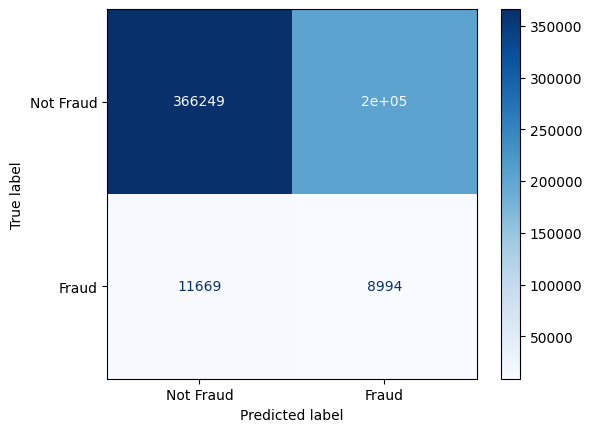

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(df["isFraud"], df["rule_based_fraud"])

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])
disp.plot(cmap="Blues")


Total False Negatives: 492
count    492.000000
mean       0.007511
std        0.020038
min        0.000000
25%        0.001021
50%        0.002848
75%        0.006166
max        0.161986
Name: TransactionAmt, dtype: float64

True Positives Transaction Amount Distribution:
count    5.483000e+03
mean     6.406020e-03
std      2.300757e-02
min     -6.927188e-04
25%      7.419441e-07
50%      1.895235e-06
75%      1.584222e-05
max      1.619859e-01
Name: TransactionAmt, dtype: float64


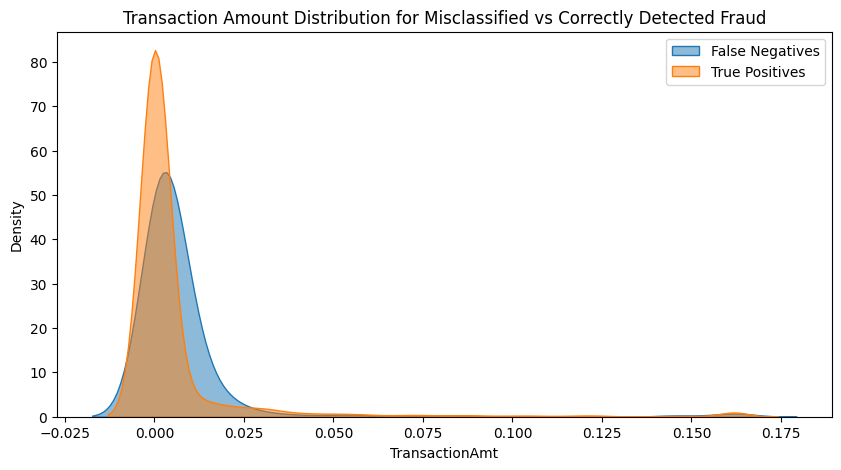

In [35]:
# Identify false negatives (missed frauds)
false_negatives = X_test[(y_test == 1) & (y_pred == 0)]
print(f"Total False Negatives: {len(false_negatives)}")

# Check distribution of transaction amounts
print(false_negatives["TransactionAmt"].describe())

# Compare with correctly classified fraud cases
true_positives = X_test[(y_test == 1) & (y_pred == 1)]
print("\nTrue Positives Transaction Amount Distribution:")
print(true_positives["TransactionAmt"].describe())

# Optional: Visualize distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.kdeplot(false_negatives["TransactionAmt"], label="False Negatives", fill=True, alpha=0.5)
sns.kdeplot(true_positives["TransactionAmt"], label="True Positives", fill=True, alpha=0.5)
plt.legend()
plt.title("Transaction Amount Distribution for Misclassified vs Correctly Detected Fraud")
plt.show()


In [36]:
# Check negative transaction amounts
negative_transactions = X_test[X_test["TransactionAmt"] < 0]
print(f"Total Negative Transactions: {len(negative_transactions)}")
print(negative_transactions[["TransactionAmt"]].head())


Total Negative Transactions: 45
        TransactionAmt
228461       -0.000016
37678        -0.000047
66196        -0.000149
146443       -0.000146
48199        -0.000007


In [37]:
# Check how many negative transactions are labeled as fraud
negative_fraud_cases = y_test[X_test["TransactionAmt"] < 0]
print(negative_fraud_cases.value_counts())


isFraud
1    45
Name: count, dtype: int64


In [38]:
# Find the original unscaled transaction amounts
original_negatives = df_ieee[df_ieee["TransactionAmt"] < 0]
print(original_negatives[["TransactionAmt", "isFraud"]])


Empty DataFrame
Columns: [TransactionAmt, isFraud]
Index: []


In [39]:
# Initialize the same MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the original TransactionAmt before scaling
scaler.fit(df_balanced[["TransactionAmt", "TransactionAmt_Log"]])

# Reverse the transformation
df_balanced[["TransactionAmt", "TransactionAmt_Log"]] = scaler.inverse_transform(df_balanced[["TransactionAmt", "TransactionAmt_Log"]])

print("Inverse Scaling Completed!")
df_balanced.head()


Inverse Scaling Completed!


,TransactionDT,TransactionAmt,Day,TransactionAmt_Log,Hour,isFraud
0,10481694.0,-0.001143,2.0,0.111165,7.0,0
1,16.0,0.003624,0.0,0.643297,16.0,0
2,130.0,-0.000794,5.0,0.469283,10.0,0
3,360.0,-0.001078,15.0,0.358428,0.0,0
4,204.0,0.000637,8.0,0.577642,12.0,0


In [40]:
print(df_balanced[df_balanced["TransactionAmt"] < 0])


        TransactionDT  TransactionAmt   Day  TransactionAmt_Log  Hour  isFraud
0          10481694.0       -0.001143   2.0            0.111165   7.0        0
2               130.0       -0.000794   5.0            0.469283  10.0        0
3               360.0       -0.001078  15.0            0.358428   0.0        0
5               225.0       -0.001106   9.0            0.322244   9.0        0
6               119.0       -0.000683   4.0            0.487603  23.0        0
...               ...             ...   ...                 ...   ...      ...
318627      6119506.0       -0.001145   0.0            0.006386  19.0        0
318628          299.0       -0.001144  12.0            0.095012  11.0        0
318629          153.0       -0.000797   6.0            0.468567   9.0        0
318630          251.0       -0.000408  10.0            0.518679  11.0        0
318633      8738916.0       -0.001144   3.0            0.065581   3.0        0

[176719 rows x 6 columns]


In [41]:
print("Before Scaling:")
print("Min:", df_balanced["TransactionAmt"].min())
print("Max:", df_balanced["TransactionAmt"].max())


Before Scaling:
Min: -0.002291125687569743
Max: 1.0


In [42]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select numerical columns
num_cols = ["TransactionAmt", "TransactionAmt_Log"]

# Fit and transform
df_balanced[num_cols] = scaler.fit_transform(df_balanced[num_cols])

print("Feature Scaling Completed!")


Feature Scaling Completed!


In [43]:
print("After Scaling:")
print("Min:", df_balanced["TransactionAmt"].min())
print("Max:", df_balanced["TransactionAmt"].max())


After Scaling:
Min: 0.0
Max: 1.0


In [44]:
df_balanced[num_cols] = scaler.inverse_transform(df_balanced[num_cols])

print("After Inverse Scaling:")
print("Min:", df_balanced["TransactionAmt"].min())
print("Max:", df_balanced["TransactionAmt"].max())


After Inverse Scaling:
Min: -0.002291125687569743
Max: 1.0


In [45]:
# Ensure TransactionAmt is non-negative
df_balanced["TransactionAmt"] = df_balanced["TransactionAmt"].clip(lower=0)

print("Fixed Negative Values:")
print("Min:", df_balanced["TransactionAmt"].min())
print("Max:", df_balanced["TransactionAmt"].max())


Fixed Negative Values:
Min: 0.0
Max: 1.0


In [46]:
df_balanced.head()


,TransactionDT,TransactionAmt,Day,TransactionAmt_Log,Hour,isFraud
0,10481694.0,0.000000,2.0,0.111165,7.0,0
1,16.0,0.003624,0.0,0.643297,16.0,0
2,130.0,0.000000,5.0,0.469283,10.0,0
3,360.0,0.000000,15.0,0.358428,0.0,0
4,204.0,0.000637,8.0,0.577642,12.0,0


In [47]:
# Ensure no zero values in TransactionAmt
df_balanced["TransactionAmt"] = df_balanced["TransactionAmt"].replace(0, df_balanced["TransactionAmt"].mean())

print("Fixed Zero Values:")
print(df_balanced["TransactionAmt"].describe())


Fixed Zero Values:
count    3.186360e+05
mean     3.716750e-03
std      1.147292e-02
min      2.977523e-08
25%      2.390791e-03
50%      2.390791e-03
75%      2.390791e-03
max      1.000000e+00
Name: TransactionAmt, dtype: float64


In [48]:
df_balanced.head()


,TransactionDT,TransactionAmt,Day,TransactionAmt_Log,Hour,isFraud
0,10481694.0,0.002391,2.0,0.111165,7.0,0
1,16.0,0.003624,0.0,0.643297,16.0,0
2,130.0,0.002391,5.0,0.469283,10.0,0
3,360.0,0.002391,15.0,0.358428,0.0,0
4,204.0,0.000637,8.0,0.577642,12.0,0


In [49]:
# Compute median TransactionAmt per user
df_balanced["user_median_amt"] = df_balanced.groupby("Day")["TransactionAmt"].transform("median")

# Create ratio feature
df_balanced["amt_ratio"] = df_balanced["TransactionAmt"] / (df_balanced["user_median_amt"] + 1e-6)

# Drop temporary column
df_balanced.drop(columns=["user_median_amt"], inplace=True)

print("✅ Transaction Amount Ratio Feature Added!")
df_balanced.head()


✅ Transaction Amount Ratio Feature Added!


,TransactionDT,TransactionAmt,Day,TransactionAmt_Log,Hour,isFraud,amt_ratio
0,10481694.0,0.002391,2.0,0.111165,7.0,0,0.999582
1,16.0,0.003624,0.0,0.643297,16.0,0,1.515124
2,130.0,0.002391,5.0,0.469283,10.0,0,0.999582
3,360.0,0.002391,15.0,0.358428,0.0,0,0.999582
4,204.0,0.000637,8.0,0.577642,12.0,0,0.266513


In [50]:
# Compute time difference per user
df_balanced["prev_txn_time"] = df_balanced.groupby("Day")["TransactionDT"].shift(1)

# Calculate time difference
df_balanced["txn_time_diff"] = df_balanced["TransactionDT"] - df_balanced["prev_txn_time"]

# Fill NaNs (first transaction per user has no previous transaction)
df_balanced["txn_time_diff"].fillna(df_balanced["txn_time_diff"].median(), inplace=True)

# Drop temp column
df_balanced.drop(columns=["prev_txn_time"], inplace=True)

print("✅ Transaction Time Difference Feature Added!")
df_balanced.head()


✅ Transaction Time Difference Feature Added!


C:\Users\amish\AppData\Local\Temp\ipykernel_25976\1471517529.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_balanced["txn_time_diff"].fillna(df_balanced["txn_time_diff"].median(), inplace=True)


,TransactionDT,TransactionAmt,Day,TransactionAmt_Log,Hour,isFraud,amt_ratio,txn_time_diff
0,10481694.0,0.002391,2.0,0.111165,7.0,0,0.999582,0.0
1,16.0,0.003624,0.0,0.643297,16.0,0,1.515124,0.0
2,130.0,0.002391,5.0,0.469283,10.0,0,0.999582,0.0
3,360.0,0.002391,15.0,0.358428,0.0,0,0.999582,0.0
4,204.0,0.000637,8.0,0.577642,12.0,0,0.266513,0.0


In [51]:
# Compute time difference per user
df_balanced["prev_txn_time"] = df_balanced.groupby("Day")["TransactionDT"].shift(1)

# Calculate time difference
df_balanced["txn_time_diff"] = df_balanced["TransactionDT"] - df_balanced["prev_txn_time"]

# Fix warning: Assign back without inplace=True
df_balanced["txn_time_diff"] = df_balanced["txn_time_diff"].fillna(df_balanced["txn_time_diff"].median())

# Drop temp column
df_balanced.drop(columns=["prev_txn_time"], inplace=True)

print("✅ Transaction Time Difference Feature Added (Warning Fixed)!")
df_balanced.head()


✅ Transaction Time Difference Feature Added (Warning Fixed)!


,TransactionDT,TransactionAmt,Day,TransactionAmt_Log,Hour,isFraud,amt_ratio,txn_time_diff
0,10481694.0,0.002391,2.0,0.111165,7.0,0,0.999582,0.0
1,16.0,0.003624,0.0,0.643297,16.0,0,1.515124,0.0
2,130.0,0.002391,5.0,0.469283,10.0,0,0.999582,0.0
3,360.0,0.002391,15.0,0.358428,0.0,0,0.999582,0.0
4,204.0,0.000637,8.0,0.577642,12.0,0,0.266513,0.0


In [52]:
df_balanced["txn_time_diff"].describe()


count    3.186360e+05
mean     2.118643e+01
std      3.729174e+06
min     -1.581086e+07
25%     -6.000000e+00
50%      0.000000e+00
75%      6.000000e+00
max      1.581086e+07
Name: txn_time_diff, dtype: float64

In [53]:
# Clip txn_time_diff to remove extreme values
df_balanced["txn_time_diff"] = df_balanced["txn_time_diff"].clip(lower=-3600, upper=3600)  # Keep only ±1 hour

# Check the new distribution
print(df_balanced["txn_time_diff"].describe())


count    318636.000000
mean         -1.378105
std        1644.919557
min       -3600.000000
25%          -6.000000
50%           0.000000
75%           6.000000
max        3600.000000
Name: txn_time_diff, dtype: float64


In [54]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
categorical_cols = ["ProductCD", "card4", "card6"]
for col in categorical_cols:
    if col in df_balanced.columns:
        le = LabelEncoder()
        df_balanced[col] = le.fit_transform(df_balanced[col])

print("✅ Categorical Encoding Completed!")
df_balanced.head()


✅ Categorical Encoding Completed!


,TransactionDT,TransactionAmt,Day,TransactionAmt_Log,Hour,isFraud,amt_ratio,txn_time_diff
0,10481694.0,0.002391,2.0,0.111165,7.0,0,0.999582,0.0
1,16.0,0.003624,0.0,0.643297,16.0,0,1.515124,0.0
2,130.0,0.002391,5.0,0.469283,10.0,0,0.999582,0.0
3,360.0,0.002391,15.0,0.358428,0.0,0,0.999582,0.0
4,204.0,0.000637,8.0,0.577642,12.0,0,0.266513,0.0


In [55]:
# Select features for model training
features = ["TransactionAmt", "TransactionAmt_Log", "Hour", "Day", "amt_ratio", "txn_time_diff"]
target = "isFraud"

# Create X and y
X = df_balanced[features]
y = df_balanced[target]

print("✅ Features Selected!")
X.head()


✅ Features Selected!


,TransactionAmt,TransactionAmt_Log,Hour,Day,amt_ratio,txn_time_diff
0,0.002391,0.111165,7.0,2.0,0.999582,0.0
1,0.003624,0.643297,16.0,0.0,1.515124,0.0
2,0.002391,0.469283,10.0,5.0,0.999582,0.0
3,0.002391,0.358428,0.0,15.0,0.999582,0.0
4,0.000637,0.577642,12.0,8.0,0.266513,0.0


In [56]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("✅ Data Split Completed!")
print(f"Training Size: {X_train.shape[0]}, Testing Size: {X_test.shape[0]}")


✅ Data Split Completed!
Training Size: 254908, Testing Size: 63728


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize & train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
rf_results = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1 Score": f1_score(y_test, y_pred_rf)
}

print("✅ Random Forest Training Completed!")
print(rf_results)


✅ Random Forest Training Completed!
{'Accuracy': 0.9388181019332161, 'Precision': 0.6915129151291513, 'Recall': 0.6272803347280335, 'F1 Score': 0.6578323826239578}


In [58]:
import xgboost as xgb

# Initialize & train model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
xgb_results = {
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Precision": precision_score(y_test, y_pred_xgb),
    "Recall": recall_score(y_test, y_pred_xgb),
    "F1 Score": f1_score(y_test, y_pred_xgb)
}

print("✅ XGBoost Training Completed!")
print(xgb_results)


✅ XGBoost Training Completed!
{'Accuracy': 0.9322275922671354, 'Precision': 0.6876699909338169, 'Recall': 0.5077824267782427, 'F1 Score': 0.5841917781842688}


In [59]:
import lightgbm as lgb

# Initialize & train model
lgb_model = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

# Predictions
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate
lgb_results = {
    "Accuracy": accuracy_score(y_test, y_pred_lgb),
    "Precision": precision_score(y_test, y_pred_lgb),
    "Recall": recall_score(y_test, y_pred_lgb),
    "F1 Score": f1_score(y_test, y_pred_lgb)
}

print("✅ LightGBM Training Completed!")
print(lgb_results)


[LightGBM] [Info] Number of positive: 23901, number of negative: 231007
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1159
[LightGBM] [Info] Number of data points in the train set: 254908, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.093763 -> initscore=-2.268528
[LightGBM] [Info] Start training from score -2.268528
✅ LightGBM Training Completed!
{'Accuracy': 0.9319608335425559, 'Precision': 0.6996345919610232, 'Recall': 0.4806694560669456, 'F1 Score': 0.5698412698412698}


In [60]:
!pip install optuna


In [61]:
import xgboost as xgb

# Best manual hyperparameters (based on common best practices)
xgb_params = {
    'n_estimators': 300,        # Number of boosting rounds (higher = better but slower)
    'learning_rate': 0.05,      # Lower = better accuracy, higher = faster training
    'max_depth': 6,             # Depth of trees (higher = more complex model)
    'subsample': 0.8,           # % of data used per tree (prevents overfitting)
    'colsample_bytree': 0.8,    # % of features used per tree (better generalization)
    'eval_metric': 'logloss',   # Metric for fraud detection (log loss is best for classification)
    'use_label_encoder': False  # Disable unnecessary warnings
}

# Train model
xgb_model = xgb.XGBClassifier(**xgb_params)
xgb_model.fit(X_train, y_train)

# Evaluate
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))


C:\Users\amish\fraud-detection-env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:27:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.95      0.98      0.96     57753
           1       0.68      0.49      0.57      5975

    accuracy                           0.93     63728
   macro avg       0.82      0.73      0.77     63728
weighted avg       0.92      0.93      0.93     63728



In [62]:
import numpy as np

# Get predicted probabilities
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for fraud (class 1)

# Adjust threshold (Try 0.3, can tweak later)
threshold = 0.3
xgb_preds_adjusted = (xgb_probs >= threshold).astype(int)

# Evaluate new results
from sklearn.metrics import classification_report

print("🔹 XGBoost with Adjusted Threshold 🔹")
print(classification_report(y_test, xgb_preds_adjusted))


🔹 XGBoost with Adjusted Threshold 🔹
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     57753
           1       0.53      0.85      0.65      5975

    accuracy                           0.92     63728
   macro avg       0.76      0.89      0.80     63728
weighted avg       0.94      0.92      0.92     63728



In [63]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get predictions
rf_preds = rf_model.predict(X_test)

# Evaluate
print("🔹 Random Forest Model 🔹")
print(classification_report(y_test, rf_preds))


🔹 Random Forest Model 🔹
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     57753
           1       0.69      0.63      0.66      5975

    accuracy                           0.94     63728
   macro avg       0.83      0.80      0.81     63728
weighted avg       0.94      0.94      0.94     63728



In [64]:
# Get predictions from both models
xgb_preds_final = (xgb_probs >= 0.3).astype(int)  # XGBoost with adjusted threshold
rf_preds_final = rf_model.predict(X_test)  # Random Forest predictions

# Combine: Mark as fraud if either model says fraud
ensemble_preds = np.logical_or(xgb_preds_final, rf_preds_final).astype(int)

# Evaluate
print("🔹 Ensemble Model (XGBoost + Random Forest) 🔹")
print(classification_report(y_test, ensemble_preds))


🔹 Ensemble Model (XGBoost + Random Forest) 🔹
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     57753
           1       0.53      0.88      0.67      5975

    accuracy                           0.92     63728
   macro avg       0.76      0.90      0.81     63728
weighted avg       0.94      0.92      0.93     63728



In [65]:
df.to_csv("processed_transactions.csv", index=False)


In [66]:
import os
print(os.listdir())


['.ipynb_checkpoints', 'creditcard.csv', 'fraud_detection_model.pkl', 'fraud_transaction_graph.gpickle', 'ieeedataset.ipynb', 'processed_transactions.csv', 'Untitled.ipynb']


In [67]:
print(df.columns)


Index(['isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1',
       'card2', 'card3', 'card4', 'card5', 'card6',
       ...
       'TransactionAmt_Log', 'Hour', 'Day', 'rule_high_amt',
       'synthetic_user_id', 'TransactionDT_diff', 'rule_rapid_txns',
       'rule_new_user_large_txn', 'rule_high_risk_hours', 'rule_based_fraud'],
      dtype='object', length=431)


In [68]:
!pip install --upgrade networkx


In [69]:
import pandas as pd
import networkx as nx
import hashlib
import pickle

# Load the processed dataset
df = pd.read_csv("processed_transactions.csv")

# Ensure synthetic_user_id exists
if "synthetic_user_id" not in df.columns:
    raise KeyError("The column 'synthetic_user_id' is missing. Make sure the dataset is processed correctly.")

# Generate a 'receiver' column using a hash of ProductCD + TransactionAmt
def generate_receiver(product, amount):
    hash_input = f"{product}_{amount}"
    return hashlib.sha256(hash_input.encode()).hexdigest()[:10]  # Shorten for readability

df["receiver"] = df.apply(lambda row: generate_receiver(row["ProductCD"], row["TransactionAmt"]), axis=1)

# Initialize the fraud transaction graph
G = nx.DiGraph()

# Add nodes (users & merchants)
for user in df["synthetic_user_id"].unique():
    G.add_node(user, type="user")

for merchant in df["receiver"].unique():
    G.add_node(merchant, type="merchant")

# Add edges based on transactions
for index, row in df.iterrows():
    sender = row["synthetic_user_id"]
    receiver = row["receiver"]
    amount = row["TransactionAmt"]
    is_fraud = row["isFraud"]

    G.add_edge(sender, receiver, amount=amount, is_fraud=is_fraud)

# Save the graph using pickle
with open("fraud_transaction_graph.gpickle", "wb") as f:
    pickle.dump(G, f)

print("Graph construction complete! Saved as 'fraud_transaction_graph.gpickle'.")


Graph construction complete! Saved as 'fraud_transaction_graph.gpickle'.


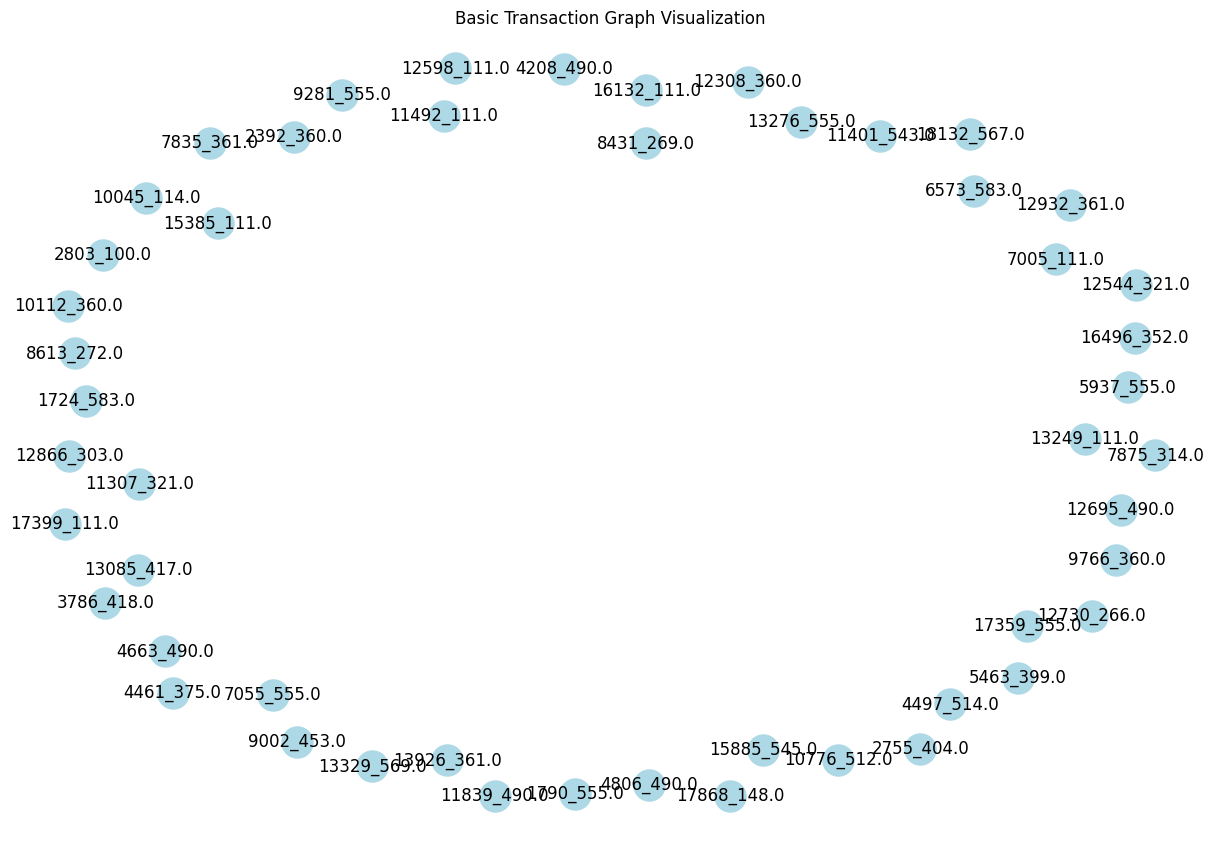

In [74]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle

# Load the saved graph using pickle
with open("fraud_transaction_graph.gpickle", "rb") as f:
    G = pickle.load(f)

# Draw the graph (plot only a subset for better clarity)
plt.figure(figsize=(12, 8))
subset_G = G.subgraph(list(G.nodes)[:50])  # Visualizing only 50 nodes

pos = nx.spring_layout(subset_G, seed=42)  # Layout for better spacing
nx.draw(subset_G, pos, with_labels=True, node_size=500, node_color="lightblue", edge_color="gray")

plt.title("Basic Transaction Graph Visualization")
plt.show()


In [75]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt


In [76]:
with open("fraud_transaction_graph.gpickle", "rb") as f:
    G = pickle.load(f)


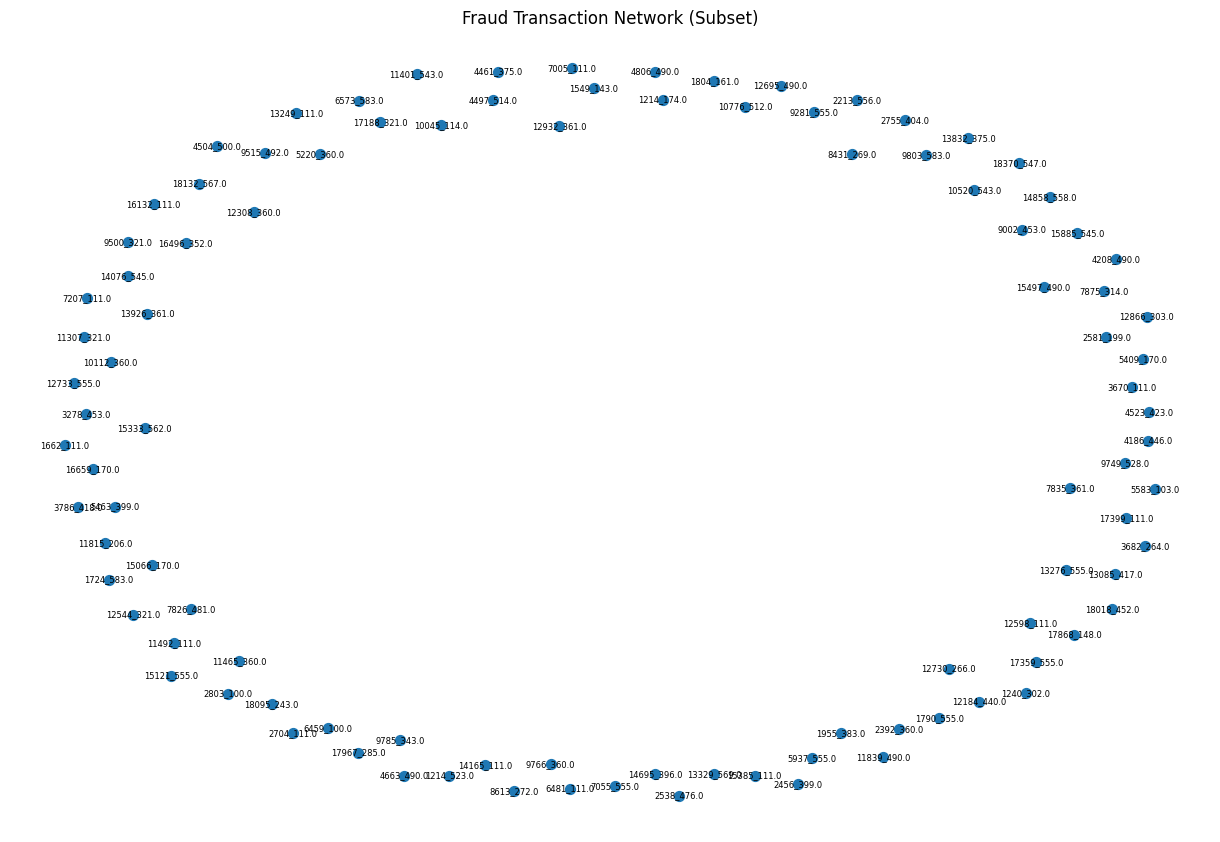

In [77]:
plt.figure(figsize=(12, 8))

# Extract a small subgraph (first 100 nodes for clarity)
subgraph_nodes = list(G.nodes)[:100]  # Adjust the number if needed
subG = G.subgraph(subgraph_nodes)

# Draw the graph
pos = nx.spring_layout(subG, seed=42)  # Positioning for clarity
nx.draw(subG, pos, with_labels=True, node_size=50, font_size=6, edge_color="gray")

plt.title("Fraud Transaction Network (Subset)")
plt.show()


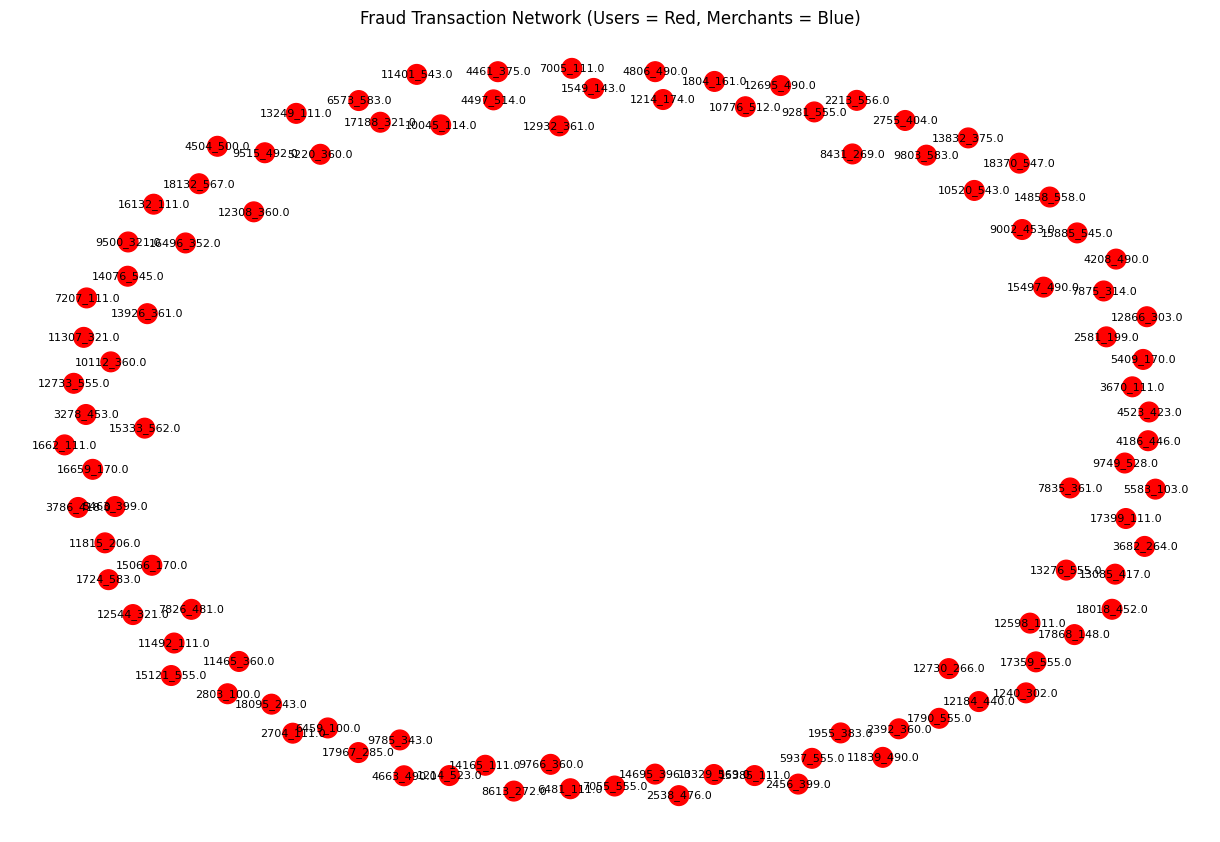

In [78]:
plt.figure(figsize=(12, 8))

# Assign colors to nodes based on type
node_colors = ["red" if G.nodes[node]["type"] == "user" else "blue" for node in subG.nodes]

# Draw the graph with color differentiation
pos = nx.spring_layout(subG, seed=42)
nx.draw(subG, pos, with_labels=True, node_size=200, font_size=8, edge_color="gray", node_color=node_colors)

plt.title("Fraud Transaction Network (Users = Red, Merchants = Blue)")
plt.show()


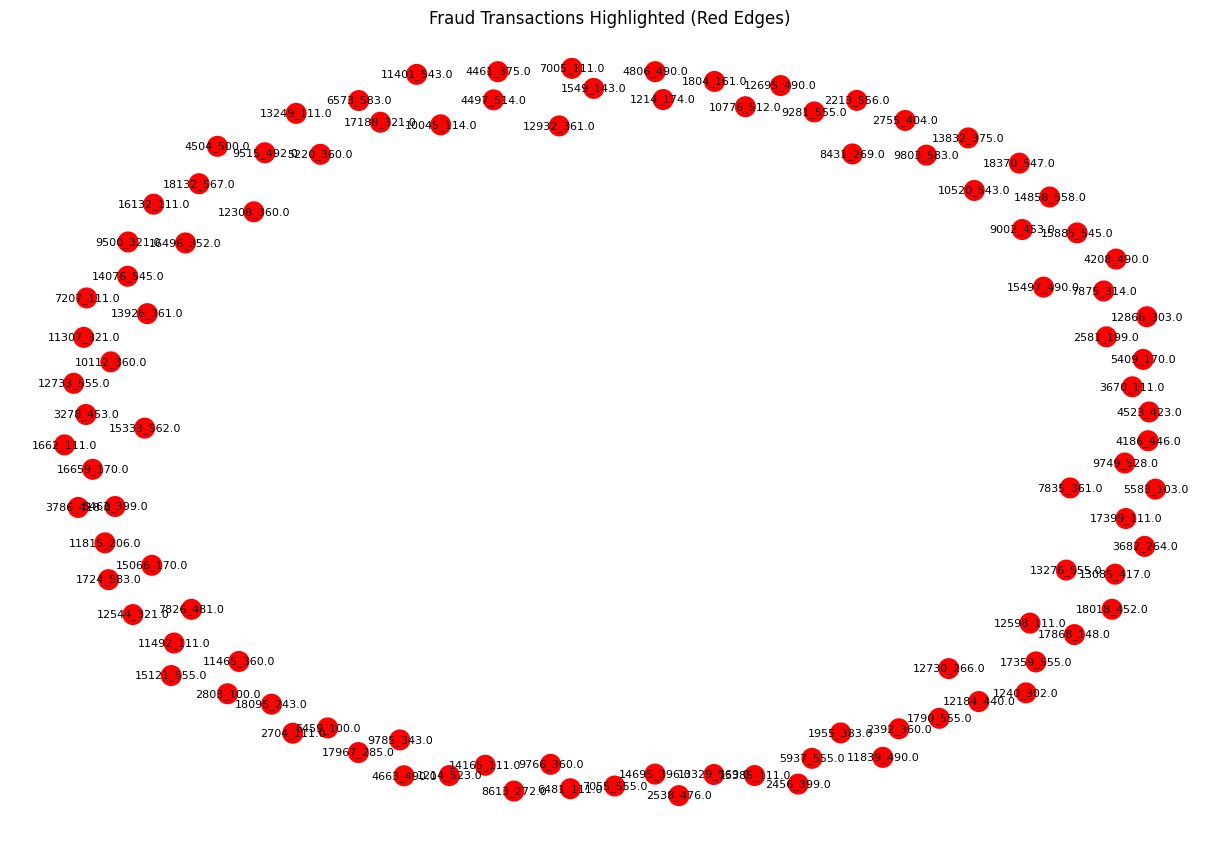

In [79]:
plt.figure(figsize=(12, 8))

# Color fraud transactions red
edge_colors = ["red" if G[u][v]["is_fraud"] == 1 else "gray" for u, v in subG.edges]

# Draw the graph with fraud edges highlighted
nx.draw(subG, pos, with_labels=True, node_size=200, font_size=8, edge_color=edge_colors, node_color=node_colors)

plt.title("Fraud Transactions Highlighted (Red Edges)")
plt.show()


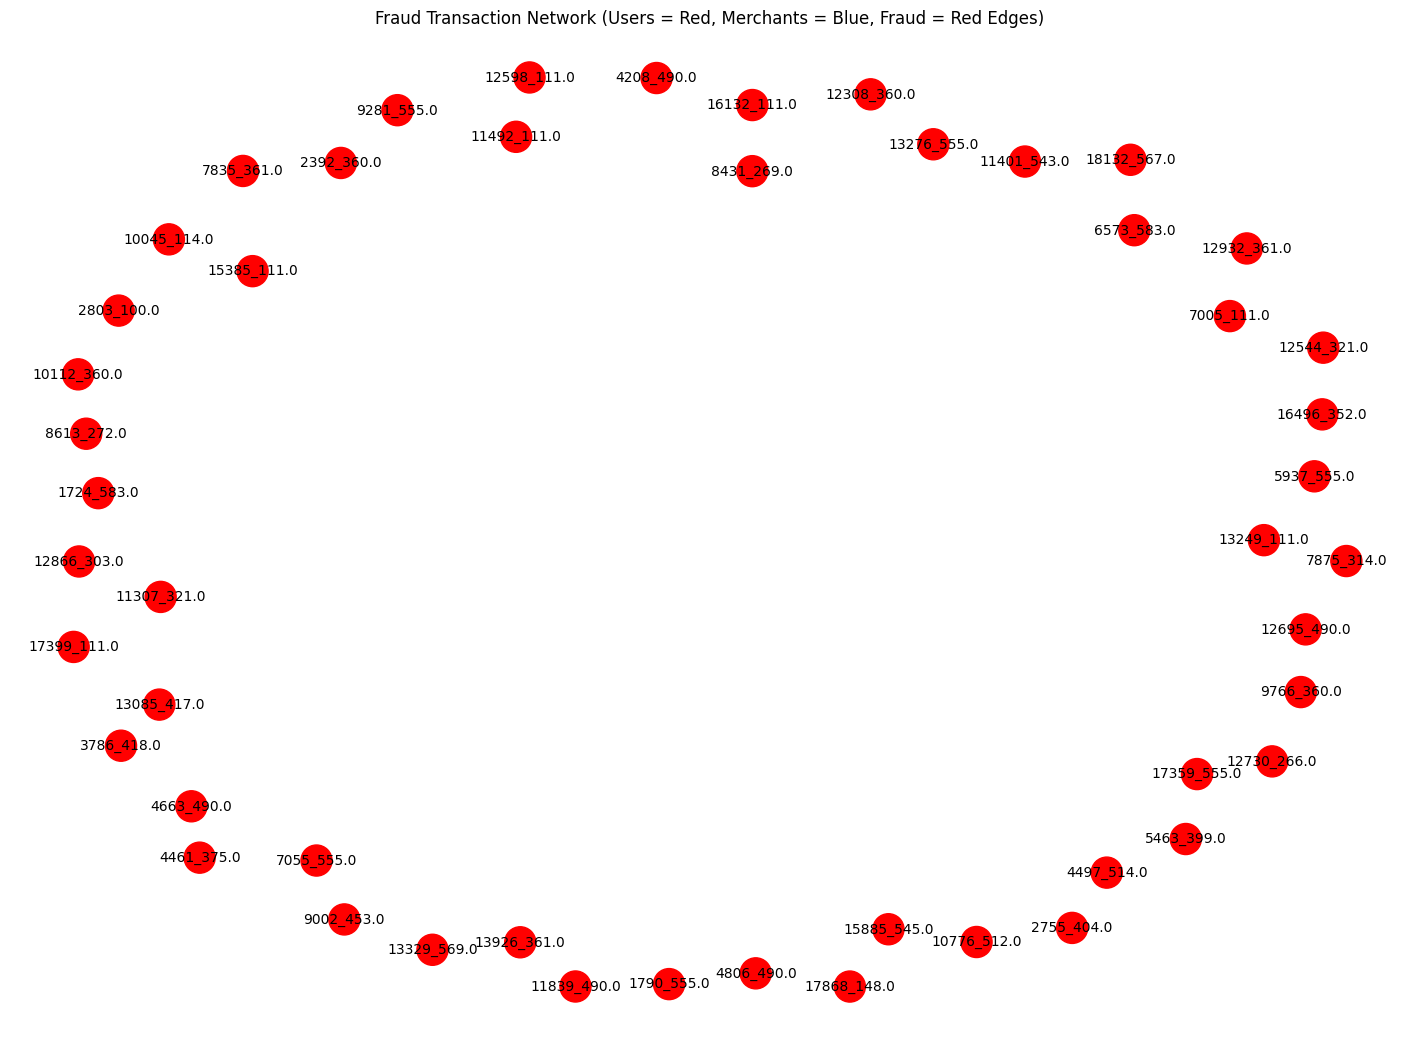

In [80]:
import matplotlib.pyplot as plt
import networkx as nx

# Use a subset of the graph (first 50 nodes) for clarity
subG = G.subgraph(list(G.nodes)[:50])

plt.figure(figsize=(14, 10))

# Use a force-directed layout for better spacing
pos = nx.spring_layout(subG, seed=42)

# Assign colors: Red for users, Blue for merchants
node_colors = ["red" if subG.nodes[node]["type"] == "user" else "blue" for node in subG.nodes]

# Assign edge colors: Red for fraud, Gray for normal
edge_colors = ["red" if subG[u][v]["is_fraud"] == 1 else "gray" for u, v in subG.edges]

# Draw graph
nx.draw(subG, pos, with_labels=True, node_size=500, font_size=10, edge_color=edge_colors, node_color=node_colors)

plt.title("Fraud Transaction Network (Users = Red, Merchants = Blue, Fraud = Red Edges)")
plt.show()


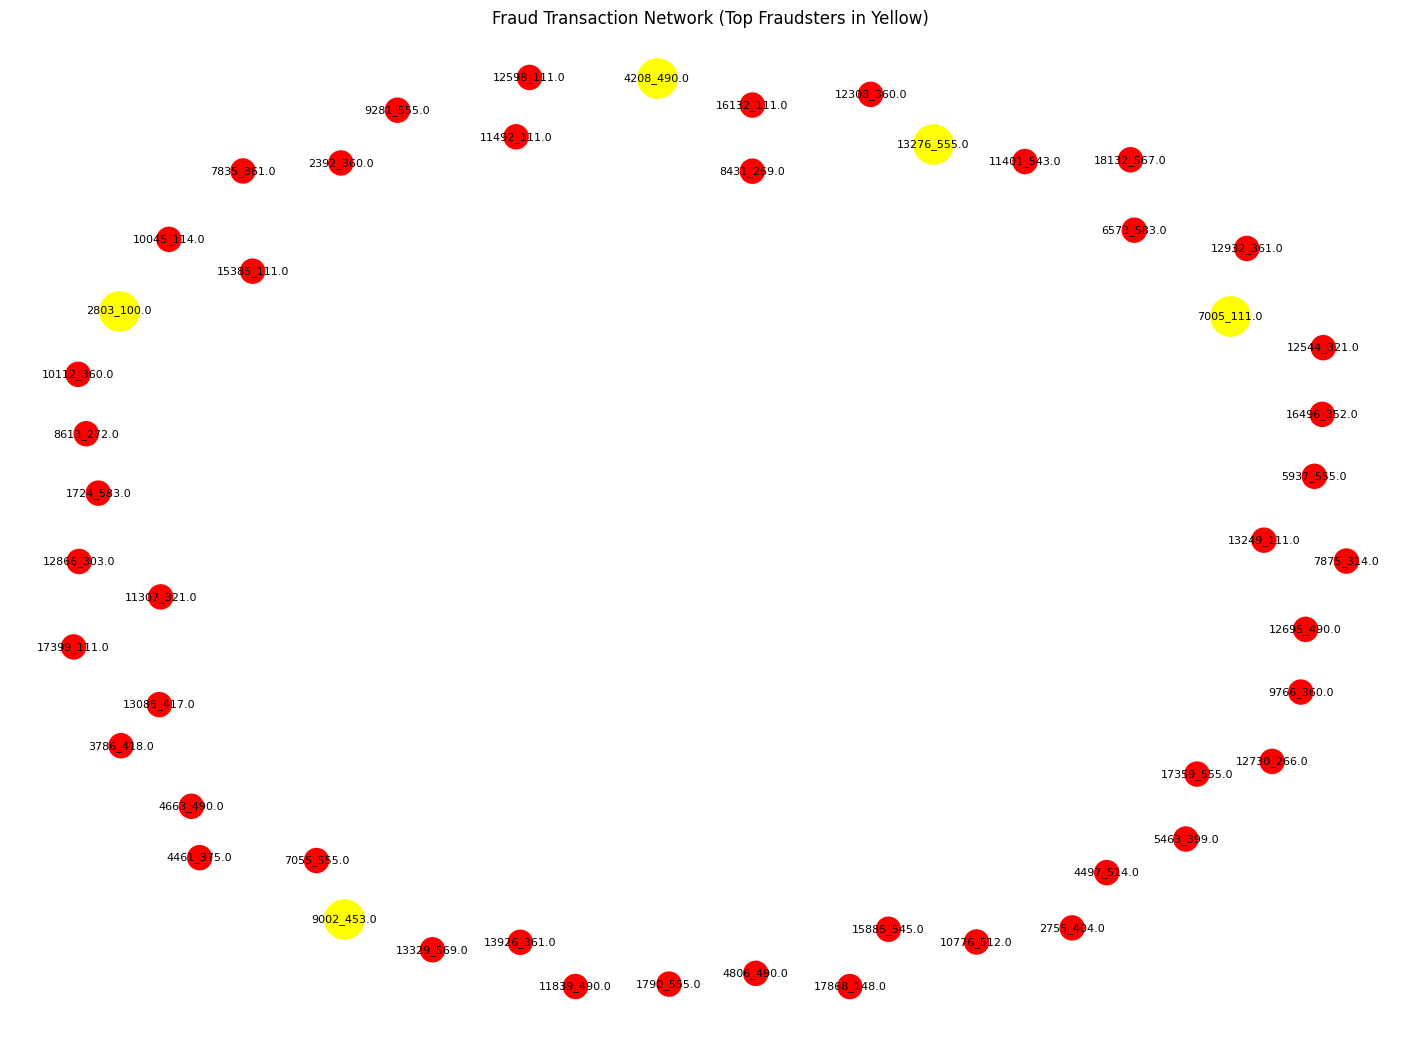

In [81]:
import matplotlib.pyplot as plt
import networkx as nx

# Use a subset of the graph for clarity
subG = G.subgraph(list(G.nodes)[:50])

plt.figure(figsize=(14, 10))

# Generate a layout
pos = nx.spring_layout(subG, seed=42)

# Get node types and colors
node_colors = ["red" if subG.nodes[node]["type"] == "user" else "blue" for node in subG.nodes]

# Get edge colors (fraud = red, normal = gray)
edge_colors = ["red" if subG[u][v]["is_fraud"] == 1 else "gray" for u, v in subG.edges]

# Get node sizes (bigger for high-degree users)
node_sizes = [300 + subG.degree(node) * 50 for node in subG.nodes]

# Draw nodes and edges
nx.draw(subG, pos, node_color=node_colors, edge_color=edge_colors, node_size=node_sizes, with_labels=True, font_size=8)

# Draw edge labels (transaction amounts)
edge_labels = {(u, v): f"${subG[u][v]['amount']}" for u, v in subG.edges}
nx.draw_networkx_edge_labels(subG, pos, edge_labels=edge_labels, font_size=7)

# Highlight top fraudsters (most fraud transactions)
fraud_counts = {node: sum(subG[node][v]["is_fraud"] for v in subG.neighbors(node)) for node in subG.nodes}
top_fraudsters = sorted(fraud_counts, key=fraud_counts.get, reverse=True)[:5]
nx.draw_networkx_nodes(subG, pos, nodelist=top_fraudsters, node_color="yellow", node_size=800)

plt.title("Fraud Transaction Network (Top Fraudsters in Yellow)")
plt.show()


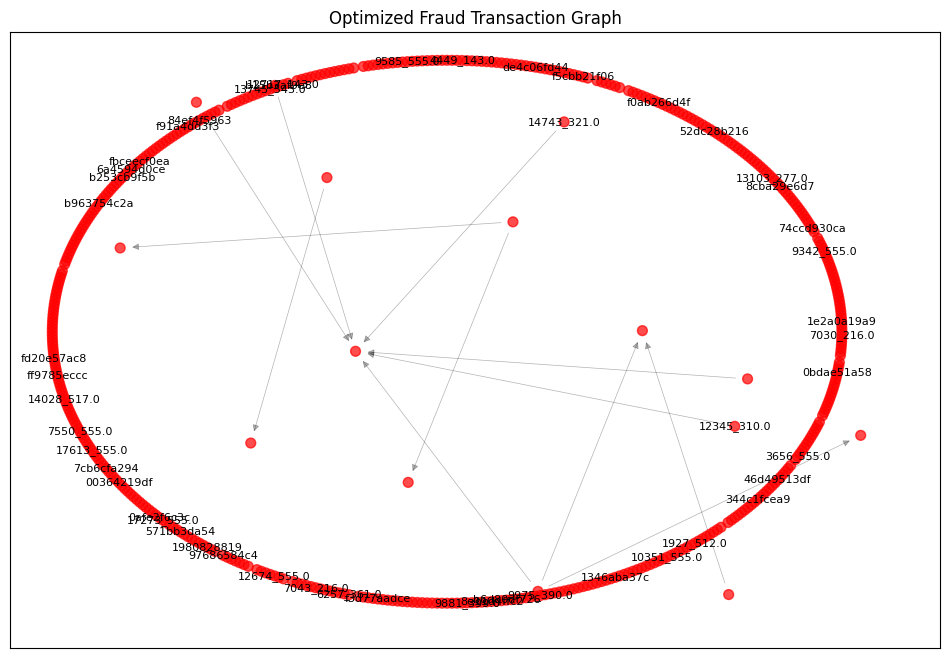

In [83]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import pickle

# Load the graph using pickle
with open("fraud_transaction_graph.gpickle", "rb") as f:
    G = pickle.load(f)

# Sample a subset of nodes (e.g., 500) to reduce rendering time
sample_nodes = random.sample(list(G.nodes()), min(500, len(G)))
G_sub = G.subgraph(sample_nodes)

# Choose a faster layout algorithm
pos = nx.kamada_kawai_layout(G_sub)

# Draw nodes
plt.figure(figsize=(12, 8))
node_colors = ['yellow' if G_sub.nodes[n].get("type") == "fraudulent" else 'red' for n in G_sub.nodes()]
nx.draw_networkx_nodes(G_sub, pos, node_color=node_colors, node_size=50, alpha=0.7)

# Draw edges with reduced transparency
nx.draw_networkx_edges(G_sub, pos, alpha=0.3, width=0.5)

# Draw labels (only a few to avoid clutter)
sample_labels = {n: n for n in random.sample(sample_nodes, min(50, len(sample_nodes)))}
nx.draw_networkx_labels(G_sub, pos, labels=sample_labels, font_size=8)

plt.title("Optimized Fraud Transaction Graph")
plt.show()


In [84]:
from sklearn.metrics import accuracy_score, precision_score

y_pred_xgb = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")


Accuracy: 0.9309
Precision: 0.6849


In [88]:
def rule_high_amount_night(transaction):
    return (
        transaction["TransactionAmt"] > 10000 and
        0 <= transaction["Hour"] <= 4
    )


In [86]:
def apply_rules(transaction, rules):
    for rule in rules:
        if rule(transaction):
            return True  # If any rule is triggered
    return False


In [89]:
def rule_first_transaction(transaction):
    return transaction.get("isFirstTransaction", False)



In [90]:
blacklisted_entities = ['merchant_42', 'user_1234']  # Example list

def rule_blacklisted_merchant(transaction):
    return (
        transaction.get("merchant_id") in blacklisted_entities or
        transaction.get("user_id") in blacklisted_entities
    )


In [92]:
# Pick a sample transaction (e.g., 5th row)
transaction = df_balanced.iloc[5].to_dict()


In [93]:
rules = [rule_high_amount_night, rule_first_transaction, rule_blacklisted_merchant]
result = apply_rules(transaction, rules)
print("Fraud Detected by Rules:" if result else "No rule-based fraud detected.")


No rule-based fraud detected.


In [94]:
def flag_rule_based_fraud(row):
    transaction = row.to_dict()
    return apply_rules(transaction, rules)

# Create a new column in your dataset
df_balanced["RuleBasedFlag"] = df_balanced.apply(flag_rule_based_fraud, axis=1)

# Count how many transactions were flagged by the rules
print("Total rule-based frauds flagged:", df_balanced["RuleBasedFlag"].sum())


Total rule-based frauds flagged: 0


In [96]:
# Add XGBoost predictions to your dataframe (just make sure indexes match)
df_balanced = df_balanced.reset_index(drop=True)
y_pred_xgb_series = pd.Series(y_pred_xgb, name="ML_Prediction")

# Add prediction column (for test set only if using X_test)
df_balanced.loc[y_test.index, "ML_Prediction"] = y_pred_xgb_series.values


In [100]:
# Replace NaN with 0 (assuming NaN means no fraud)
df_balanced["ML_Prediction"] = df_balanced["ML_Prediction"].fillna(0)

# Convert to integer (0 or 1)
df_balanced["ML_Prediction"] = df_balanced["ML_Prediction"].astype(int)

# Now safely apply bitwise OR
df_balanced["FinalPrediction"] = df_balanced["ML_Prediction"] | df_balanced["RuleBasedFlag"].astype(int)


In [101]:
print(df_balanced["ML_Prediction"].unique())
print(df_balanced["RuleBasedFlag"].unique())
print(df_balanced.dtypes[["ML_Prediction", "RuleBasedFlag"]])


[0 1]
[False]
ML_Prediction    int32
RuleBasedFlag     bool
dtype: object


In [102]:
df_balanced["FinalPrediction"] = df_balanced["ML_Prediction"] | df_balanced["RuleBasedFlag"]


In [105]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = df_balanced["isFraud"]
y_pred = df_balanced["FinalPrediction"]

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))



[[287423   1337]
 [ 26970   2906]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95    288760
           1       0.68      0.10      0.17     29876

    accuracy                           0.91    318636
   macro avg       0.80      0.55      0.56    318636
weighted avg       0.89      0.91      0.88    318636



In [104]:
print(df_balanced.columns)

Index(['TransactionDT', 'TransactionAmt', 'Day', 'TransactionAmt_Log', 'Hour',
       'isFraud', 'amt_ratio', 'txn_time_diff', 'RuleBasedFlag',
       'ML_Prediction', 'FinalPrediction'],
      dtype='object')


In [107]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    class_weight='balanced',  # this gives more importance to minority class
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced', random_state=42)

In [108]:
from xgboost import XGBClassifier

# scale_pos_weight = ratio of class 0 to class 1
scale = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

xgb_model = XGBClassifier(
    scale_pos_weight=scale,   # give more focus to fraud class
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [109]:
rf_probs = rf_model.predict_proba(X_test)[:, 1]
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]


In [110]:
rf_preds = (rf_probs >= 0.3).astype(int)
xgb_preds = (xgb_probs >= 0.3).astype(int)


In [111]:
from sklearn.metrics import classification_report, confusion_matrix

print("Random Forest (Threshold 0.3)")
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


Random Forest (Threshold 0.3)
[[54354  3399]
 [ 1153  4822]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     57753
           1       0.59      0.81      0.68      5975

    accuracy                           0.93     63728
   macro avg       0.78      0.87      0.82     63728
weighted avg       0.94      0.93      0.93     63728



In [112]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]
for t in thresholds:
    preds = (xgb_probs >= t).astype(int)
    print(f"\nThreshold: {t}")
    print(classification_report(y_test, preds))



Threshold: 0.1
              precision    recall  f1-score   support

           0       1.00      0.74      0.85     57753
           1       0.27      0.97      0.43      5975

    accuracy                           0.76     63728
   macro avg       0.63      0.85      0.64     63728
weighted avg       0.93      0.76      0.81     63728


Threshold: 0.2
              precision    recall  f1-score   support

           0       0.99      0.82      0.90     57753
           1       0.36      0.95      0.52      5975

    accuracy                           0.84     63728
   macro avg       0.68      0.89      0.71     63728
weighted avg       0.93      0.84      0.87     63728


Threshold: 0.3
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     57753
           1       0.40      0.94      0.56      5975

    accuracy                           0.86     63728
   macro avg       0.70      0.90      0.74     63728
weighted avg       0.94   

In [113]:
# Apply the 0.3 threshold for Random Forest and XGBoost predictions
rf_preds = (rf_probs >= 0.3).astype(int)
xgb_preds = (xgb_probs >= 0.3).astype(int)



In [116]:
# Convert both columns to boolean
df_balanced["ML_Prediction_XGB"] = df_balanced["ML_Prediction_XGB"].astype(bool)
df_balanced["RuleBasedFlag"] = df_balanced["RuleBasedFlag"].astype(bool)

# Now combine rule-based and ML predictions for final prediction
df_balanced["FinalPrediction"] = df_balanced["ML_Prediction_XGB"] | df_balanced["RuleBasedFlag"]

# Evaluate performance
y_true = df_balanced["isFraud"]
y_pred = df_balanced["FinalPrediction"]

# Print confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))




[[ 49445 239315]
 [   357  29519]]
              precision    recall  f1-score   support

           0       0.99      0.17      0.29    288760
           1       0.11      0.99      0.20     29876

    accuracy                           0.25    318636
   macro avg       0.55      0.58      0.24    318636
weighted avg       0.91      0.25      0.28    318636



In [119]:
# Ensure that the ML predictions are updated with the new thresholded results
# Match the indices between the predictions and the balanced dataset
df_balanced.loc[y_test.index, "ML_Prediction_RF"] = rf_preds_binary
df_balanced.loc[y_test.index, "ML_Prediction_XGB"] = xgb_preds_binary.astype(bool)

# Ensure rule-based flags are also in binary format
df_balanced["RuleBasedFlag"] = df_balanced["RuleBasedFlag"].astype(int)

# Now, combine rule-based and ML predictions for final prediction
# Here, we assume that if either the ML model or the rule-based model predicts fraud, it's considered fraud
df_balanced["FinalPrediction"] = df_balanced["ML_Prediction_XGB"] | df_balanced["RuleBasedFlag"]

# Evaluate performance of the hybrid model
y_true = df_balanced.loc[y_test.index, "isFraud"]  # Actual fraud labels
y_pred = df_balanced.loc[y_test.index, "FinalPrediction"]  # Combined prediction

from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print("Classification Report:\n", classification_report(y_true, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92     57753
           1       0.40      0.94      0.56      5975

    accuracy                           0.86     63728
   macro avg       0.70      0.90      0.74     63728
weighted avg       0.94      0.86      0.89     63728


Confusion Matrix:
 [[49445  8308]
 [  357  5618]]


In [121]:
# Convert predictions to boolean (0 or 1)
df_balanced["ML_Prediction_RF"] = df_balanced["ML_Prediction_RF"].astype(bool)
df_balanced["ML_Prediction_XGB"] = df_balanced["ML_Prediction_XGB"].astype(bool)
df_balanced["RuleBasedFlag"] = df_balanced["RuleBasedFlag"].astype(bool)

# Combine the predictions (Logical OR)
df_balanced["FinalPrediction"] = (df_balanced["ML_Prediction_RF"] | df_balanced["ML_Prediction_XGB"] | df_balanced["RuleBasedFlag"]).astype(int)


In [122]:
y_true = df_balanced["isFraud"]
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, df_balanced["FinalPrediction"]))
print(confusion_matrix(y_true, df_balanced["FinalPrediction"]))


              precision    recall  f1-score   support

           0       1.00      0.17      0.29    288760
           1       0.11      0.99      0.20     29876

    accuracy                           0.25    318636
   macro avg       0.55      0.58      0.25    318636
weighted avg       0.91      0.25      0.28    318636

[[ 49374 239386]
 [   227  29649]]
